In [1]:
import numpy as np
import matplotlib.pyplot as plt
from comp_optics_utilities import *

#Define units
meter = 1
millimeter = 10** -3 * meter
nanometer = 10** -9 * meter



In [2]:
#This could be optimized by passing in a transfer function so it 
#doesnt need to be computed every time
def propagate_fresnel_transfer_2d(coordinates, A, photon_lambda, L):
#d is the delta of the grid, which is extracted from the provided coordinates
#Generate the 2d frequency space coordates that form the transfer function
#The frequency range goes from 0 (constant), to 1/dx
#np.abs(coordinates[0][0][0] - coordinates[1][1][0]) is dx (in computer science frequency indexing, in phys it would go +/-)
    print(coordinates.shape)
    fs_2d=generate_2d_coordinates(len(coordinates[0,:,0]),(1/np.abs(coordinates[0][0][0] - coordinates[0][1][0])))
    

#Analytically calculated Fresnel transfer function, by Fourier transform of the impulse response (spherical wave)

    #FFT shift the transfer function of free space and sample it
    H_fresnel = np.fft.fftshift(np.exp(1.0j * 2 * np.pi / photon_lambda * L) * np.exp(-1.0j * np.pi*photon_lambda * L * np.sum(np.square(fs_2d),axis = 2)))

    #Multiplicy the FFT of A and the transfer function to propagate
    Ap = np.fft.ifftshift(np.fft.ifft2(np.fft.fft2(np.fft.fftshift(A)) * H_fresnel))
    
    #Normalize
    Ap /= np.sqrt(np.sum(np.abs(np.square(Ap))))
    
    return Ap


Question: Why does the new propagation propagate_fresnel_transfer_2d only need to return an amplitude, rather than additionally including new coordinates like previous propagation schemes?

Answer: 

In [3]:
#10cm focusing lens, our beam is 532nm
f = -100 * millimeter
_lambda = 532 * nanometer

N=512


#Generate some phase randomization
coordinates = generate_2d_coordinates(N,2 * millimeter)
a = 0.06
ds = np.sqrt(np.sum(np.square((generate_2d_coordinates(N,2))), axis = 2))/ a
spect = (ds+1)**(-(5/3)*(ds/a)**2 * 1 / (1 + np.exp(-ds / a)))
phi_random = np.fft.fftshift(np.real(np.fft.fft2(np.fft.fftshift(np.exp(2j*np.pi  * np.random.random((N,N))) * np.random.normal(size = (N,N)) * (spect)))))


#Create a pill shaped beam and apply the random phase upon it
amplitude = np.exp(1.0j * phi_random) * (coordinates[:,:,0] ** 2 + 0.0001 * millimeter)* gaussian(coordinates[:,:,1], 0.3 * millimeter) * gaussian(coordinates[:,:,0], 0.3 * millimeter)

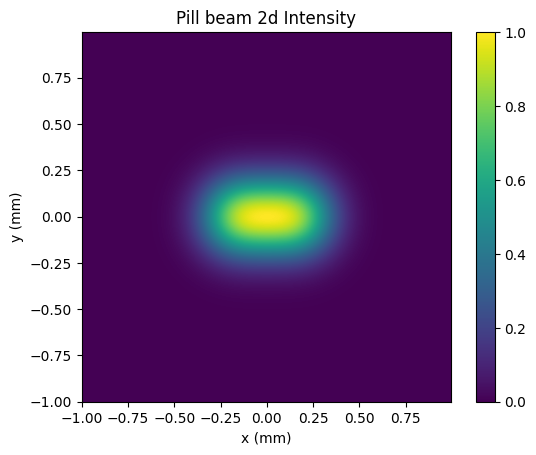

In [4]:
plot_2d_intensity(coordinates, amplitude, "Pill beam")

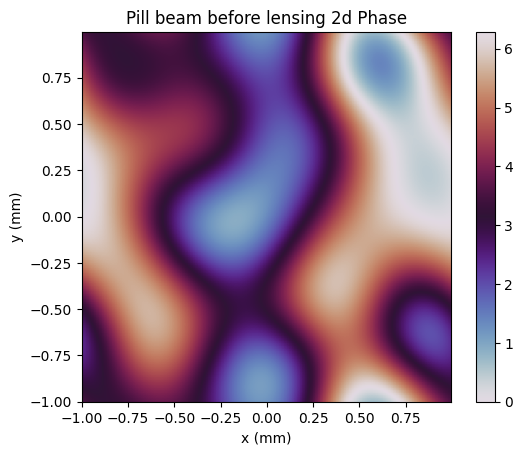

In [5]:
plot_2d_phase(coordinates, amplitude,"Pill beam before lensing")

In [6]:
#Lens the beam with the 10cm lens
amplitude = amplitude * lens(coordinates, f, _lambda)

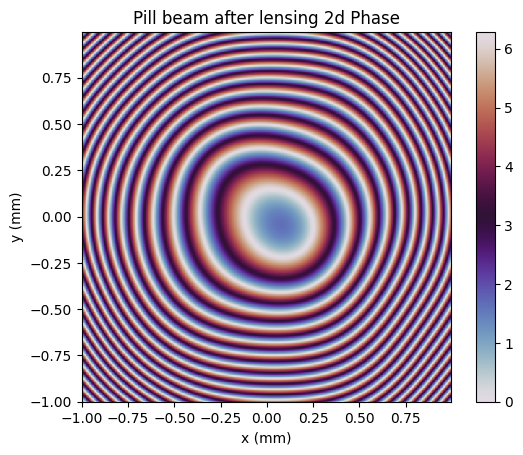

In [7]:
plot_2d_phase(coordinates, amplitude,"Pill beam after lensing")

Task: Given the beam provided amplitude after a 10cm lens, compute the "amplitude" field at 20 points along the propagation out to 27cm. Start by propagating into the Fresnel region before the focus. Hint: always propagate from the initial conditions I provide "amplitude", that way error does not build as it would successive propagations.

(512, 512, 2)


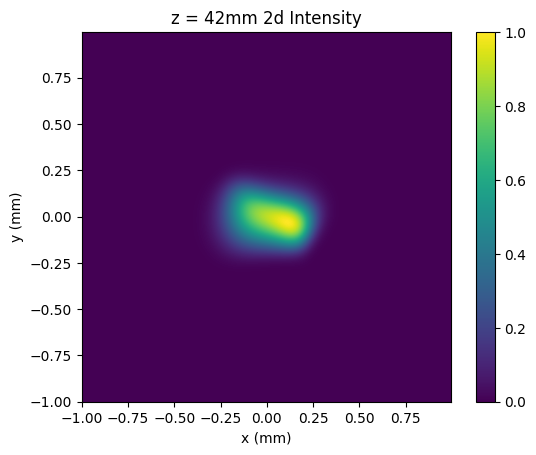

(512, 512, 2)


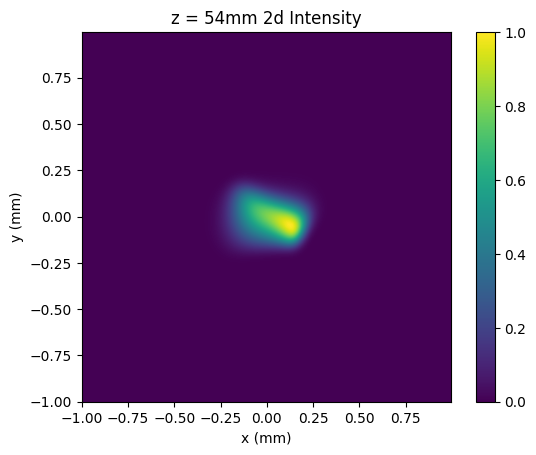

(512, 512, 2)


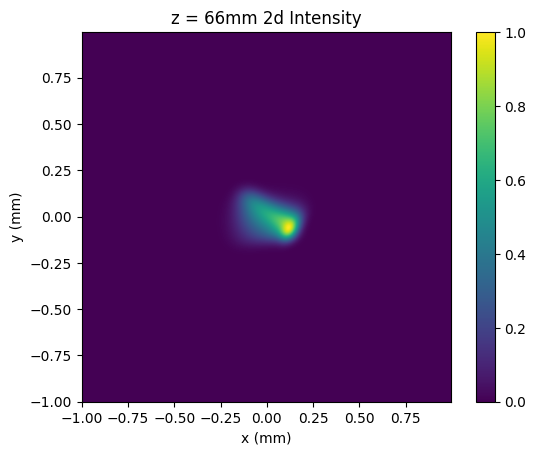

(512, 512, 2)


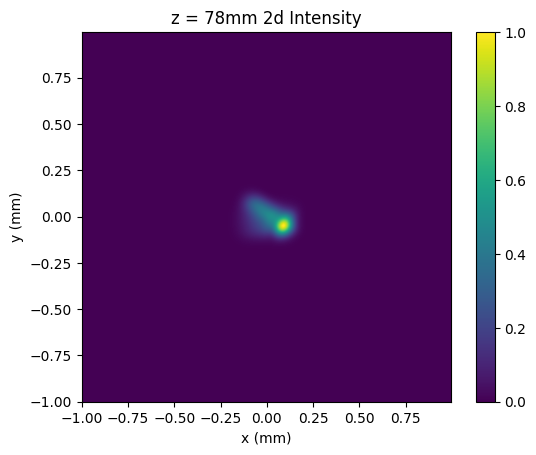

(512, 512, 2)


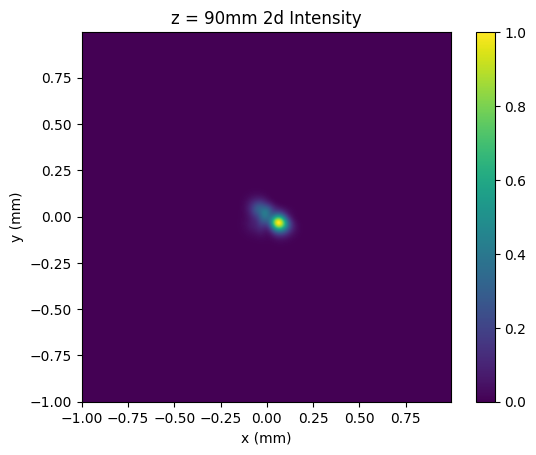

(512, 512, 2)


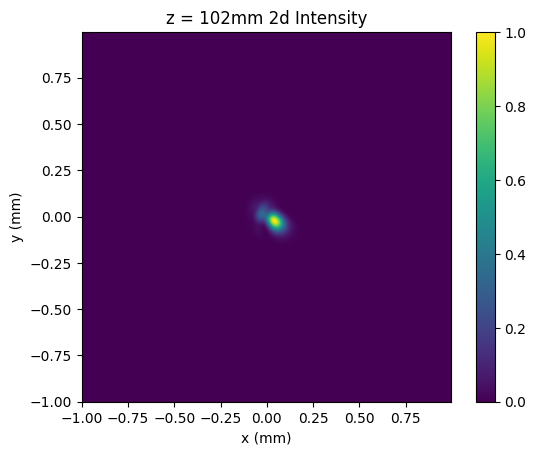

(512, 512, 2)


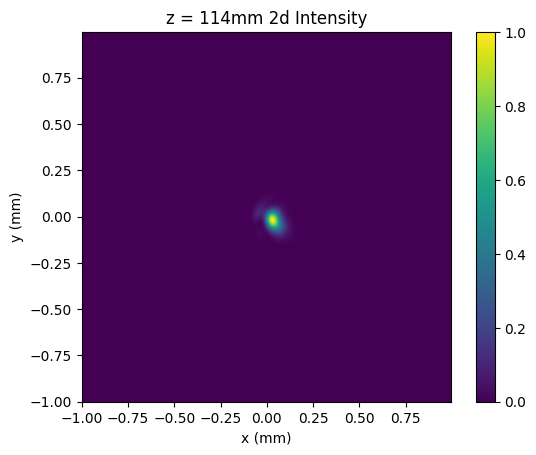

(512, 512, 2)


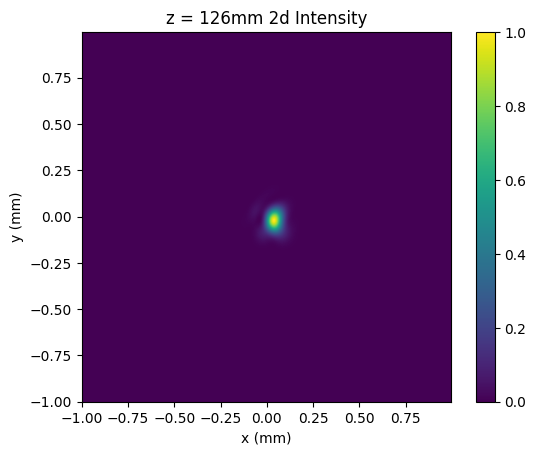

(512, 512, 2)


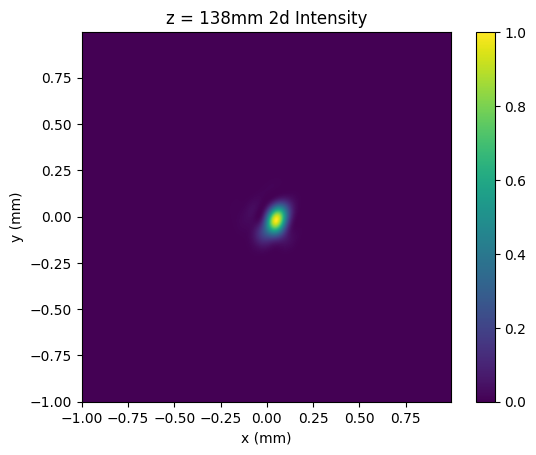

(512, 512, 2)


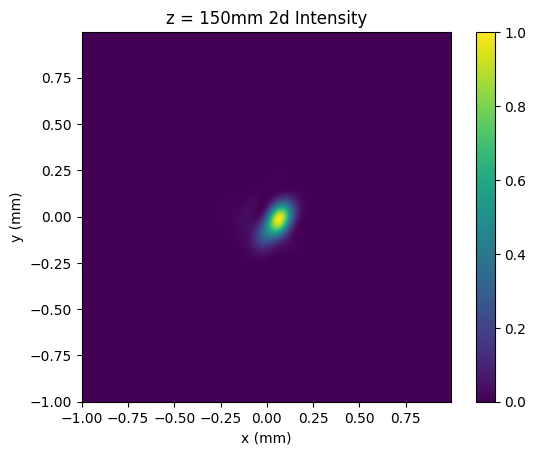

(512, 512, 2)


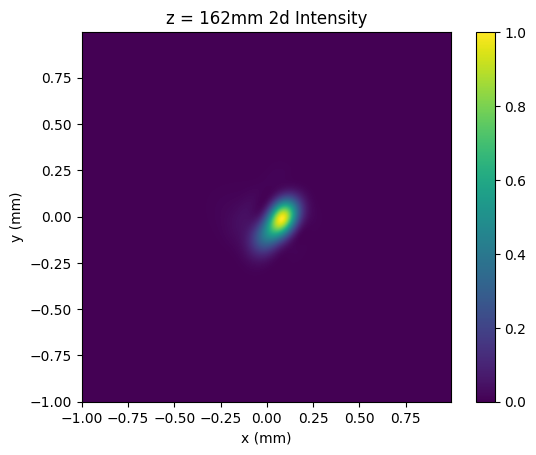

(512, 512, 2)


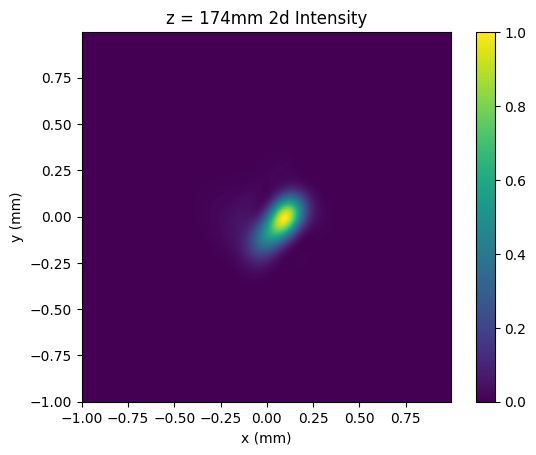

(512, 512, 2)


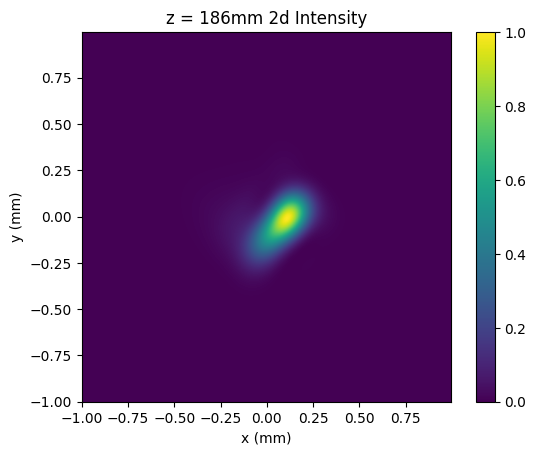

(512, 512, 2)


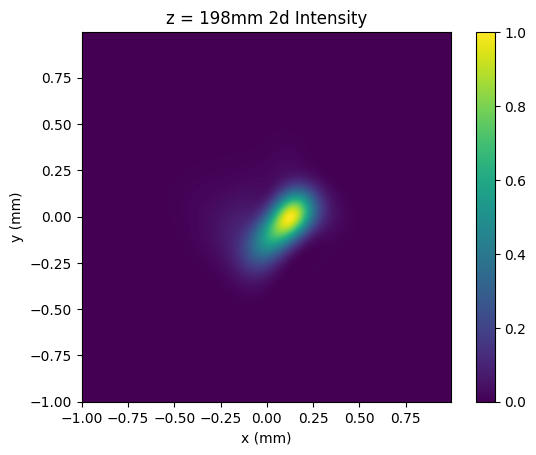

(512, 512, 2)


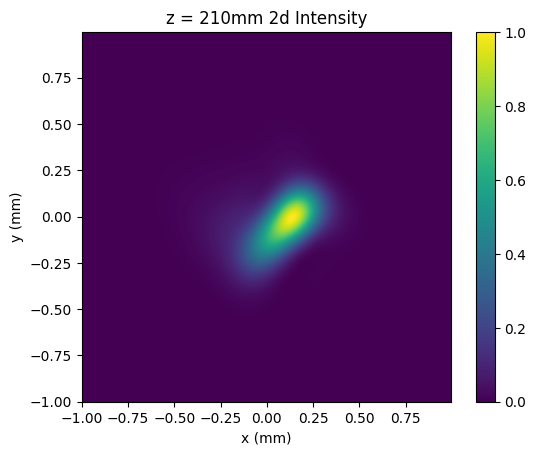

(512, 512, 2)


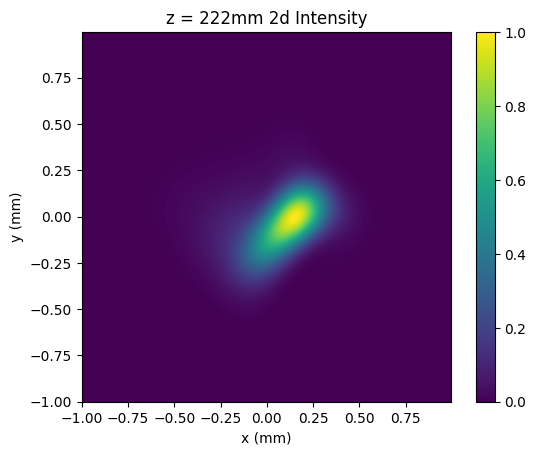

(512, 512, 2)


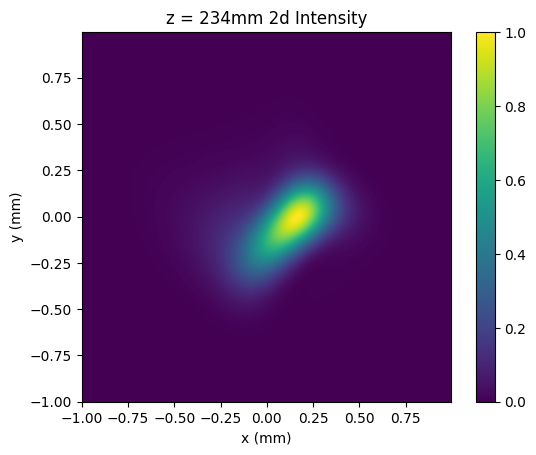

(512, 512, 2)


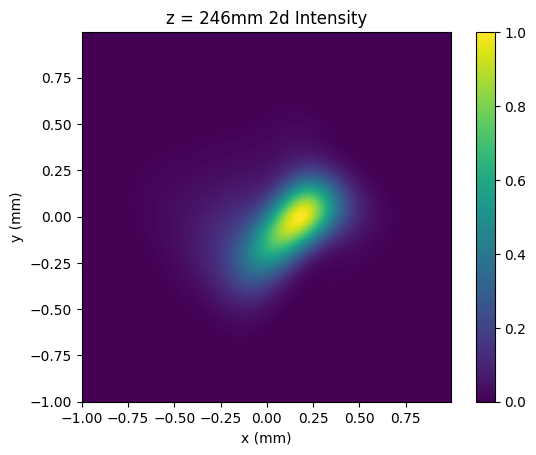

(512, 512, 2)


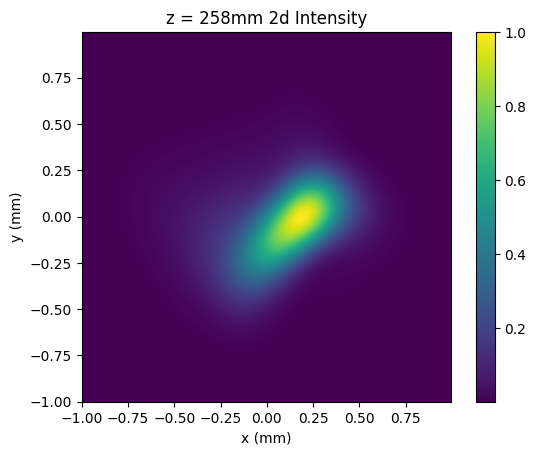

(512, 512, 2)


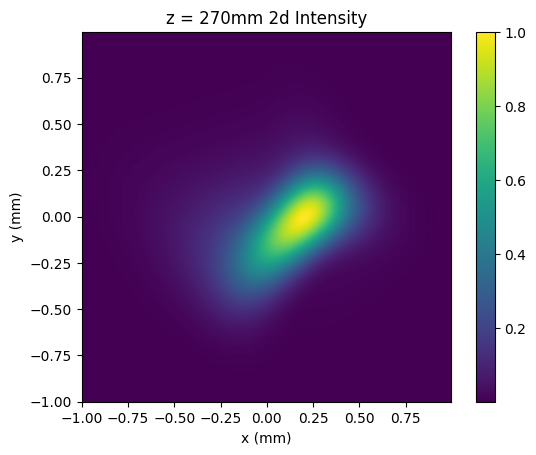

In [8]:
#Arrays to store the measured beam widths over propagation
wxs = []
wys = []
zs = []



for i in range(1,21):
    
    amplitude_prop = #Propagate to 20 distances, up to 27cm away
    
    wx,wy,cx,cy = #Calculate the beam widths and centroids
    zs.append(#distances, up to 27cm away)
    wxs.append(wx)
    wys.append(wy)
    
    plot_2d_intensity(coordinates, amplitude_prop,"z = " + str(round(zs[-1]/millimeter)) + "mm")
    plt.show()

Question: Show your calculation for where the Fresnel approximation valid region begins (Hint: far enough that the Fresnel approximation holds reasonably, but under 10cm).

Answer: Largest pill beam dimension is about 1mm. 1mm^4/(30mm)^3/(532 * 10^-9nm)/8 ~= 1%


Task: For each of those 20 propagation planes above, calculate the X and Y widths using "beam_parameters_2d", store them into arrays "wxs", "wys". Also store in the provided array "zs" the propagation distance associated with each pair of widths.

Task: Fit the M2model to the X and Y widths. Hint: As a test set phi_random = 0 and make sure your M2 parameter is 1.0 in the short axis (this indicates that the Gaussian beam has M2 1.0). Important: beam parameters generated by our code are 1 widths, but the formulation of the  M2 model given is for 2, multiply the provided widths by 2 before making the fit.


In [9]:
#M^2 model, gives the width of a laser beam in one transverse axis as a function of propagation distance
#can be fit to simulation data
def W(z,W0,M2,z0):
    return np.sqrt(W0**2 + M2**2 * (_lambda/np.pi/W0)**2 * (z - z0)**2)

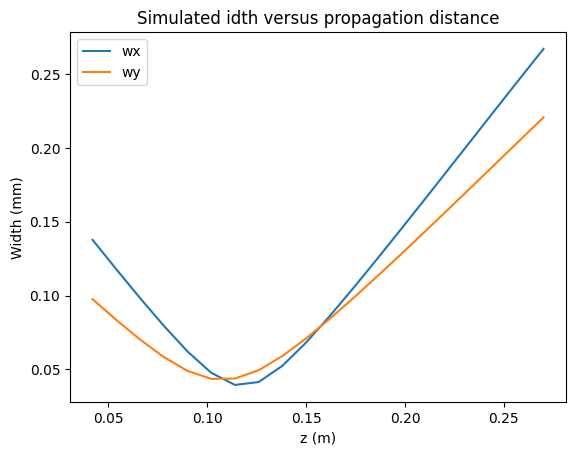

In [10]:
plt.plot(zs, np.array(wxs)/millimeter,label = "wx")
plt.plot(zs, np.array(wys)/millimeter,label = "wy")
plt.xlabel("z (m)")
plt.ylabel("Width (mm)")
plt.title("Simulated idth versus propagation distance")
plt.legend()
plt.savefig("width_versus_z.png", dpi = 400)
plt.show()


In [11]:
from scipy.optimize import curve_fit

#Our initial guess from curve fitting can come from a Gaussian beam focusing at 10cm
#p0 = [10**-4,1,0.1]

#Parameters fit W0,M2,z0 for x-axis
cfx = #Curve fit for x widths, unpack so that cfx is just the three parameters W0 M2 z0

In [12]:
#Parameters fit W0,M2,z0 for y-axis
cfy = #Curve fit for y widths, unpack so that cfx is just the three parameters W0 M2 z0

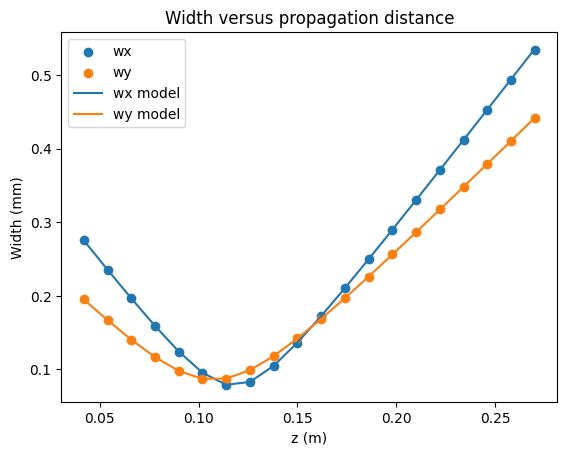

In [13]:
plt.scatter(zs, 2 * np.array(wxs)/millimeter,label = "wx")
plt.scatter(zs, 2 * np.array(wys)/millimeter,label = "wy")

#Plot the model fit curves as lines through the simulation data points
plt.plot(zs, W(zs, *cfx)/millimeter,label = "wx model")
plt.plot(zs, W(zs, *cfy)/millimeter,label = "wy model")

plt.xlabel("z (m)")
plt.ylabel("Width (mm)")
plt.title("Width versus propagation distance")
plt.legend()
plt.savefig("width_versus_z_model_fit.png", dpi = 400)
plt.show()


Question: do the focal planes have the same coordinate (z0x,z0y)? How do  the focal plane z0x,z0y coordinates compare to the lens focal length?

Answer:
